In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/My\ Drive/tmp/speech2 -r ./
%cd speech2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/speech2


In [0]:
!unzip -q data.zip

In [0]:
!unzip -q data_noisy.zip

In [0]:
import librosa
import numpy as np
import scipy.io.wavfile as wav
import IPython.display as ipd
import matplotlib.pyplot as plt

from laughter_prediction.feature_extractors import FeatureExtractor
from laughter_classification.sspnet_data_sampler import SSPNetDataSampler

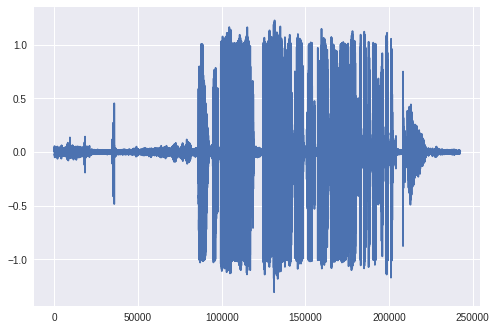

In [4]:
audio, sr = librosa.core.load('data/data/S0002.wav')
plt.plot(audio)
plt.show();
ipd.Audio(audio, rate=sr)

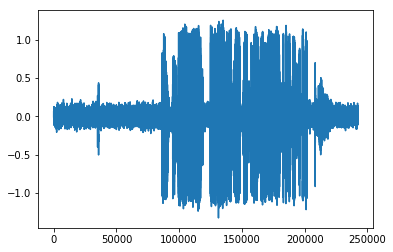

In [0]:
noise, _ = librosa.core.load('noise.wav', sr)
if len(noise) > len(audio):
    noise = noise[:len(audio)]
else:
    while len(noise) < len(audio): # loop in case noise is shorter than 
        noise = np.concatenate((noise, noise), axis=0)
    noise = noise[:len(audio)]
audio_noised = audio + 0.5 * noise
plt.plot(audio_noised)
plt.show();
ipd.Audio(audio_noised, rate=sr)

In [0]:
data = SSPNetDataSampler('data/').create_sampled_df(0.7, save_path='samples.csv')

In [6]:
data = SSPNetDataSampler('data_noisy/').create_sampled_df(0.7, save_path='samples_noisy.csv')

saving df:  samples_noisy.csv


In [0]:
data = data_noisy

In [8]:
data.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,fbank_120,fbank_121,fbank_122,fbank_123,fbank_124,fbank_125,fbank_126,fbank_127,IS_LAUGHTER,SNAME
0,-105.179454,107.219650,-28.929045,38.728706,-28.259834,-6.483830,-26.878856,-7.511452,8.119121,6.748142,...,-19.530094,-19.512117,-19.506964,-19.933543,-19.862161,-20.242476,-20.264867,-19.928179,0,S0518
1,-7.936194,117.354907,-55.310207,42.059597,-31.788246,-7.217573,-43.334952,-7.968661,-3.126460,15.150024,...,-16.552863,-16.986685,-16.691611,-16.412248,-16.770415,-17.253004,-17.354958,-16.957881,0,S0518
2,-52.527458,163.236442,-45.469614,29.849647,-30.863247,-11.993752,-40.924192,-17.924212,1.716466,-1.446855,...,-18.533132,-18.623655,-18.422531,-18.549351,-18.786604,-19.068800,-18.847743,-18.731408,0,S0518
3,-78.502672,152.218531,-45.085175,57.160192,-37.846763,-13.757917,-28.498682,-16.378840,-11.037745,-8.658194,...,-19.212150,-19.299153,-19.154000,-19.328486,-19.274184,-19.376250,-19.206249,-19.236521,0,S0518
4,-81.432433,124.611437,-15.357308,65.895249,-58.667826,27.481710,-56.029047,3.335712,-10.680436,-11.444423,...,-19.071421,-19.354948,-19.694059,-19.735669,-19.829259,-19.792807,-19.876242,-19.561983,0,S0518


In [9]:
print(len(data))

202390


In [10]:
feats = data.copy()
feats['id'] = range(1, len(feats) + 1)
feats.set_index(['SNAME', 'id'], inplace=True)
feats.head()

mfcc_0      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
SNAME id                                                                       
S0518 1  -105.179454  107.219650 -28.929045  38.728706 -28.259834  -6.483830   
      2    -7.936194  117.354907 -55.310207  42.059597 -31.788246  -7.217573   
      3   -52.527458  163.236442 -45.469614  29.849647 -30.863247 -11.993752   
      4   -78.502672  152.218531 -45.085175  57.160192 -37.846763 -13.757917   
      5   -81.432433  124.611437 -15.357308  65.895249 -58.667826  27.481710   

             mfcc_6     mfcc_7     mfcc_8     mfcc_9     ...       fbank_119  \
SNAME id                                                 ...                   
S0518 1  -26.878856  -7.511452   8.119121   6.748142     ...      -19.161510   
      2  -43.334952  -7.968661  -3.126460  15.150024     ...      -16.137882   
      3  -40.924192 -17.924212   1.716466  -1.446855     ...      -18.251867   
      4  -28.498682 -16.378840 -11.037745  -8.658194     ...      -18.918856   
      5  -56.029047   3.335712 -10.680436 -11.444423     ...      -18.743526   

          fbank_120  fbank_121  fbank_122  fbank_123  fbank_124  fbank_125  \
SNAME id                                                                     
S0518 1  -19.530094 -19.512117 -19.506964 -19.933543 -19.862161 -20.242476   
      2  -16.552863 -16.986685 -16.691611 -16.412248 -16.770415 -17.253004   
      3  -18.533132 -18.623655 -18.422531 -18.549351 -18.786604 -19.068800   
      4  -19.212150 -19.299153 -19.154000 -19.328486 -19.274184 -19.376250   
      5  -19.071421 -19.354948 -19.694059 -19.735669 -19.829259 -19.792807   

          fbank_126  fbank_127  IS_LAUGHTER  
SNAME id                                     
S0518 1  -20.264867 -19.928179            0  
      2  -17.354958 -16.957881            0  
      3  -18.847743 -18.731408            0  
      4  -19.206249 -19.236521            0  
      5  -19.876242 -19.561983            0  

[5 rows x 149 columns]

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

    def __init__(self, mfcc_len, fbank_len, hidden_len=128):
        super(Model, self).__init__()
        self.mfcc_len = mfcc_len
        self.fbank_len = fbank_len
        self.mfcc = nn.LSTM(mfcc_len, hidden_len)
        self.tmp = nn.LSTM(mfcc_len+fbank_len, hidden_len)
        self.fbank = nn.LSTM(fbank_len, hidden_len)
        self.predict = nn.Linear(2 * hidden_len, 2)

    def forward(self, features):
        res_mfcc, _ = self.mfcc(features[:, :, :self.mfcc_len])
        res_fbank, _ = self.fbank(features[:, :, self.mfcc_len:])
        res = torch.cat((res_mfcc, res_fbank), dim=2)
        res = F.softmax(self.predict(res), dim=-1)

        return res

In [12]:
feat_len = data.shape[1] - 2
sname_len = len(data[data.SNAME == data.iloc[0,-1]])
fbank_len = data.columns.str.contains('fbank').sum()
mfcc_len = feat_len - fbank_len
print("Features size", feat_len)
print("Sname size", sname_len)
print("Fbank size", fbank_len)
print("Mfcc size", mfcc_len)

Features size 148
Sname size 74
Fbank size 128
Mfcc size 20


In [0]:
from sklearn.model_selection import train_test_split

id_train, id_test = train_test_split(data['SNAME'].unique(), test_size=0.2)
data_train = np.array(feats.loc[id_train])
data_test = np.array(feats.loc[id_test])
n_train, n_test = len(id_train), len(id_test)

x_train = data_train[:, :-1].reshape(n_train, sname_len, feat_len)
y_train = data_train[:, -1].reshape(n_train, sname_len)
x_test = data_test[:, :-1].reshape(n_test, sname_len, feat_len)
y_test = data_test[:, -1].reshape(n_test, sname_len)

In [15]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (2188, 74, 148)
y_train (2188, 74)
x_test (547, 74, 148)
y_test (547, 74)


In [0]:
import torch.optim as optim

model = Model(mfcc_len, fbank_len)
loss = nn.NLLLoss()
optimize = optim.SGD(model.parameters(), lr=0.1)
labs_train = torch.tensor(y_train, dtype=torch.long).reshape(-1)
labs_test = torch.tensor(y_test, dtype=torch.long).reshape(-1)

In [17]:
print(labs_train.shape)
print(torch.tensor(y_train, dtype=torch.long).shape)

torch.Size([161912])
torch.Size([2188, 74])


In [18]:
loss_train = []
loss_test = []
for it in range(70):
    print('Iter:', it)
    
    model.train()
    model.zero_grad()
    labs = model(torch.tensor(x_train, dtype=torch.float)).reshape(-1, 2)
    l = loss(labs, labs_train)
    l.backward()
    optimize.step()
    loss_train.append(l.item())
    model.eval()
    labs = model(torch.tensor(x_test, dtype=torch.float)).reshape(-1, 2)
    l = loss(labs, labs_test)
    loss_test.append(l.item())

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9
Iter: 10
Iter: 11
Iter: 12
Iter: 13
Iter: 14
Iter: 15
Iter: 16
Iter: 17
Iter: 18
Iter: 19
Iter: 20
Iter: 21
Iter: 22
Iter: 23
Iter: 24
Iter: 25
Iter: 26
Iter: 27
Iter: 28
Iter: 29
Iter: 30
Iter: 31
Iter: 32
Iter: 33
Iter: 34
Iter: 35
Iter: 36
Iter: 37
Iter: 38
Iter: 39
Iter: 40
Iter: 41
Iter: 42
Iter: 43
Iter: 44
Iter: 45
Iter: 46
Iter: 47
Iter: 48
Iter: 49
Iter: 50
Iter: 51
Iter: 52
Iter: 53
Iter: 54
Iter: 55
Iter: 56
Iter: 57
Iter: 58
Iter: 59
Iter: 60
Iter: 61
Iter: 62
Iter: 63
Iter: 64
Iter: 65
Iter: 66
Iter: 67
Iter: 68
Iter: 69


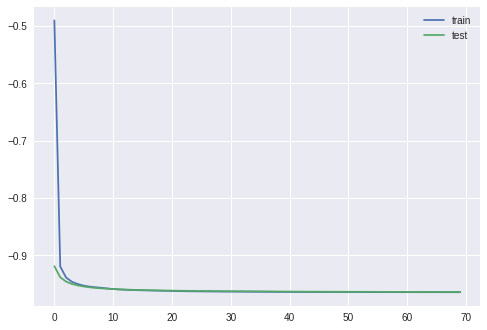

In [208]:

plt.plot(range(len(loss_train)), loss_train)
plt.plot(range(len(loss_test)), loss_test)
plt.legend(['train', 'test'])
plt.show()